This Notebook is to run a sensitive test for sample-size to accuracy.<br>

Specifically, we:<br>
1) loop through the sample size from (0.05% to 99%) of the control sample;<br>
2) calculate the accuracy

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

##### Define basic parameter

In [2]:
year_range = [f'{i}_{i+2}' for i in range(1990,2020,3)]

In [3]:
year_name = [f'Landsat_{year}' for year in year_range] + [f'Sentinel_{year}' for year in year_range[-2:]]

##### Loop through each_year and each_size to dermine a suitable size for input sample

In [5]:
Sample_size_acc = {}
size_list = list(np.arange(0.05,0.98,0.05)) + list(np.arange(0.98,0.99,0.005)) + list(np.arange(0.99,0.9999,0.003))

for name in year_name:
    for size in size_list[::-1]:
        
        # import sample
        sample = pd.read_csv(f'./Data/{name}.csv')
        sample = sample.drop(['system:index','.geo'],axis=1)

        X = sample.drop('Built',1)
        y = sample['Built']

        # train_test split the sample
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size,random_state=42,stratify =y )

        # perform the RF classification
        RF = RandomForestClassifier(n_estimators=50,oob_score=True,n_jobs=-1)
        RF.fit(X_train,y_train)
        y_pred = RF.predict(X_test)

        # get the accuracy, here get two kinds of accuracy
        acc_test = accuracy_score(y_test,y_pred)
        acc_RF   = RF.oob_score_

        # add results to the acc_dict
        Sample_size_acc[(name,f'{(1-size)*100:.2f}','acc_test')] = [acc_test]
        Sample_size_acc[(name,f'{(1-size)*100:.2f}','acc_RF')]   = [acc_RF]

        # print out the process
        print(f'Accuracy calculation of {name}_{(1-size)*100:.2f} finished!')

Accuracy calculation of Landsat_1990_1992_0.10 finished!
Accuracy calculation of Landsat_1990_1992_0.40 finished!
Accuracy calculation of Landsat_1990_1992_0.70 finished!
Accuracy calculation of Landsat_1990_1992_1.00 finished!
Accuracy calculation of Landsat_1990_1992_1.00 finished!
Accuracy calculation of Landsat_1990_1992_1.50 finished!
Accuracy calculation of Landsat_1990_1992_2.00 finished!
Accuracy calculation of Landsat_1990_1992_5.00 finished!
Accuracy calculation of Landsat_1990_1992_10.00 finished!
Accuracy calculation of Landsat_1990_1992_15.00 finished!
Accuracy calculation of Landsat_1990_1992_20.00 finished!
Accuracy calculation of Landsat_1990_1992_25.00 finished!
Accuracy calculation of Landsat_1990_1992_30.00 finished!
Accuracy calculation of Landsat_1990_1992_35.00 finished!
Accuracy calculation of Landsat_1990_1992_40.00 finished!
Accuracy calculation of Landsat_1990_1992_45.00 finished!
Accuracy calculation of Landsat_1990_1992_50.00 finished!
Accuracy calculation o

Accuracy calculation of Landsat_2005_2007_35.00 finished!
Accuracy calculation of Landsat_2005_2007_40.00 finished!
Accuracy calculation of Landsat_2005_2007_45.00 finished!
Accuracy calculation of Landsat_2005_2007_50.00 finished!
Accuracy calculation of Landsat_2005_2007_55.00 finished!
Accuracy calculation of Landsat_2005_2007_60.00 finished!
Accuracy calculation of Landsat_2005_2007_65.00 finished!
Accuracy calculation of Landsat_2005_2007_70.00 finished!
Accuracy calculation of Landsat_2005_2007_75.00 finished!
Accuracy calculation of Landsat_2005_2007_80.00 finished!
Accuracy calculation of Landsat_2005_2007_85.00 finished!
Accuracy calculation of Landsat_2005_2007_90.00 finished!
Accuracy calculation of Landsat_2005_2007_95.00 finished!
Accuracy calculation of Landsat_2008_2010_0.10 finished!
Accuracy calculation of Landsat_2008_2010_0.40 finished!
Accuracy calculation of Landsat_2008_2010_0.70 finished!
Accuracy calculation of Landsat_2008_2010_1.00 finished!
Accuracy calculati

Accuracy calculation of Sentinel_2014_2016_95.00 finished!
Accuracy calculation of Sentinel_2017_2019_0.10 finished!
Accuracy calculation of Sentinel_2017_2019_0.40 finished!
Accuracy calculation of Sentinel_2017_2019_0.70 finished!
Accuracy calculation of Sentinel_2017_2019_1.00 finished!
Accuracy calculation of Sentinel_2017_2019_1.00 finished!
Accuracy calculation of Sentinel_2017_2019_1.50 finished!
Accuracy calculation of Sentinel_2017_2019_2.00 finished!
Accuracy calculation of Sentinel_2017_2019_5.00 finished!
Accuracy calculation of Sentinel_2017_2019_10.00 finished!
Accuracy calculation of Sentinel_2017_2019_15.00 finished!
Accuracy calculation of Sentinel_2017_2019_20.00 finished!
Accuracy calculation of Sentinel_2017_2019_25.00 finished!
Accuracy calculation of Sentinel_2017_2019_30.00 finished!
Accuracy calculation of Sentinel_2017_2019_35.00 finished!
Accuracy calculation of Sentinel_2017_2019_40.00 finished!
Accuracy calculation of Sentinel_2017_2019_45.00 finished!
Accur

In [6]:
# formating the result and put it into a datafram
Size_accuracy = pd.DataFrame(Sample_size_acc).T
Size_accuracy.reset_index(inplace=True)
Size_accuracy.columns = ['Year','Size','Acc_type','Acc_value']

Size_accuracy['Year'] = Size_accuracy['Year'].astype('category')
Size_accuracy.sort_values(['Year','Size'],inplace=True)
Size_accuracy.reset_index(inplace=True,drop=True)

# save the datafram to disk
Size_accuracy.to_csv('./Result/Sample_size_acc.csv',index=False)

Size_accuracy = pd.read_csv('./Result/Sample_size_acc.csv')

##### Observe that 50% of the sample is enought for classification

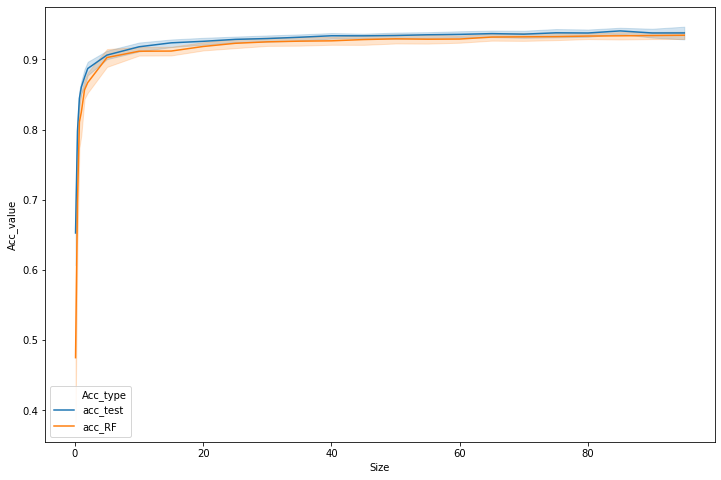

In [8]:
plt.figure(figsize=[12,8])
sns.lineplot(data=Size_accuracy,x='Size',y='Acc_value',hue='Acc_type')